# Data Cleaning and Visualisation

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Studying the dataset

In [2]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [3]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Feature Engineering 

Extracted the month from the given date to generate meaningful outputs

In [7]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i in range(1000):
    date = df.at[i, 'Date'].split('/')
    df.at[i, 'Month'] = months[int(date[0]) - 1]
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Jan
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,Mar
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,Mar
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Jan
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Feb


## Data Visualisation

In [12]:
a = {}
for i in range(1000):
    branch = df.at[i, 'Branch']
    # city = df.at[i, 'City']
    categ = df.at[i, 'Product line']
    if (branch, categ) not in a:
        a[(branch, categ)] = [df.at[i, 'gross income'], df.at[i, 'Quantity']]
    else:
        a[(branch, categ)] = [a[(branch, categ)][0] + df.at[i, 'gross income'], a[(branch, categ)][1] + df.at[i, 'Quantity']]
for i in a.keys():
    a[i] = a[i][0] / a[i][1]

In [13]:
a

{('A', 'Health and beauty'): 2.3342140077821014,
 ('C', 'Electronic accessories'): 2.7125660660660658,
 ('A', 'Home and lifestyle'): 2.877319407008086,
 ('A', 'Sports and travel'): 2.7702987987987986,
 ('A', 'Electronic accessories'): 2.7088307453416154,
 ('C', 'Home and lifestyle'): 2.700787755102042,
 ('B', 'Food and beverages'): 2.6834018518518516,
 ('B', 'Fashion accessories'): 2.631604377104377,
 ('B', 'Electronic accessories'): 2.5695363924050634,
 ('A', 'Food and beverages'): 2.611151757188498,
 ('B', 'Sports and travel'): 2.9559596273291917,
 ('B', 'Home and lifestyle'): 2.8327949152542375,
 ('B', 'Health and beauty'): 2.9733124999999996,
 ('A', 'Fashion accessories'): 2.9571806083650194,
 ('C', 'Food and beverages'): 3.0670867208672083,
 ('C', 'Sports and travel'): 2.832332075471699,
 ('C', 'Health and beauty'): 2.8563393501805057,
 ('C', 'Fashion accessories'): 3.0019590643274854}

In [18]:
categories = df.iloc[:, 5].unique()
indexing = {}
for i in range(len(categories)):
    indexing[categories[i]] = i
indexing['A'] = 0
indexing['B'] = 1
indexing['C'] = 2
Y = [[0, 0, 0] for i in range(6)]
for i in a.keys():
    Y[indexing[i[1]]][indexing[i[0]]] = a[i]
Y

[[2.3342140077821014, 2.9733124999999996, 2.8563393501805057],
 [2.7088307453416154, 2.5695363924050634, 2.7125660660660658],
 [2.877319407008086, 2.8327949152542375, 2.700787755102042],
 [2.7702987987987986, 2.9559596273291917, 2.832332075471699],
 [2.611151757188498, 2.6834018518518516, 3.0670867208672083],
 [2.9571806083650194, 2.631604377104377, 3.0019590643274854]]

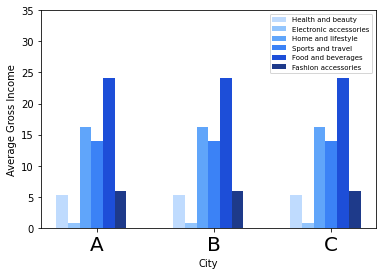

AttributeError: 'Figure' object has no attribute 'fig_to_html'

In [115]:
colors = ['#bfdbfe', '#93c5fd', '#60a5fa', '#3b82f6', '#1d4ed8', '#1e3a8a']
fig = plt.figure()
ax = fig.add_subplot(111)
ind = np.arange(3)
width = 0.1
li = []
for i in range(6):
    rects = plt.bar(ind + i*width, Y[i], width, color=colors[i])
    li.append(rects[0])
ax.set_ylabel('Average Gross Income')
ax.set_xlabel('City')
ax.set_ylim(0, 35)
xTicks = ['A', 'B', 'C']
ax.set_xticks(ind + 3*width)
xtickNames = ax.set_xticklabels(xTicks)
plt.setp(xtickNames, fontsize=20)
ax.legend(li, categories, loc = 'upper right', fontsize=7)
plt.show()
fig.fig_to_html('bar.html')

In [47]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Month'],
      dtype='object')

Text(0.5, 1.0, 'Payment per Product line ')

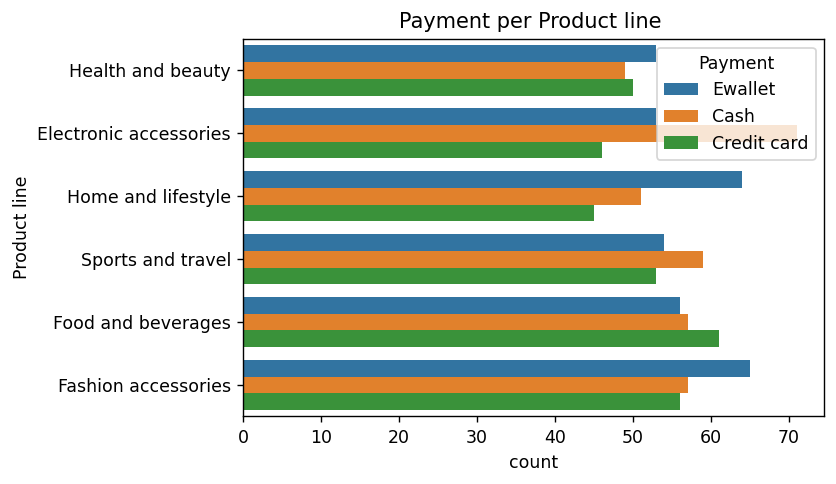

In [118]:
plt.figure(dpi=125)
sns.countplot(y = "Product line",  hue = "Payment", data =df).set_title('Payment per Product line ')

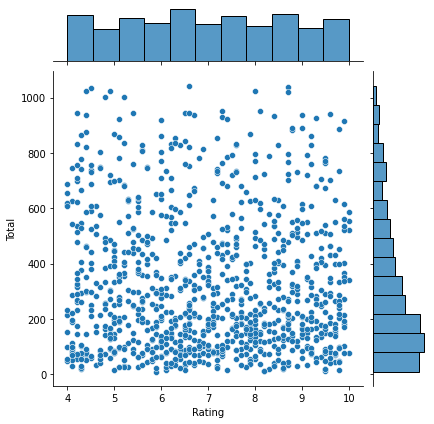

In [132]:
sns.jointplot(x='Rating', y= 'Total', data=df)

As the bar graph on the right signifies, lower the sale price, higher is the rating.
This might infer mostly the products with higher selling price doesn't fit well as value for money by the consumers. Also, the number of buyers of products with the higher price decreases drastically.

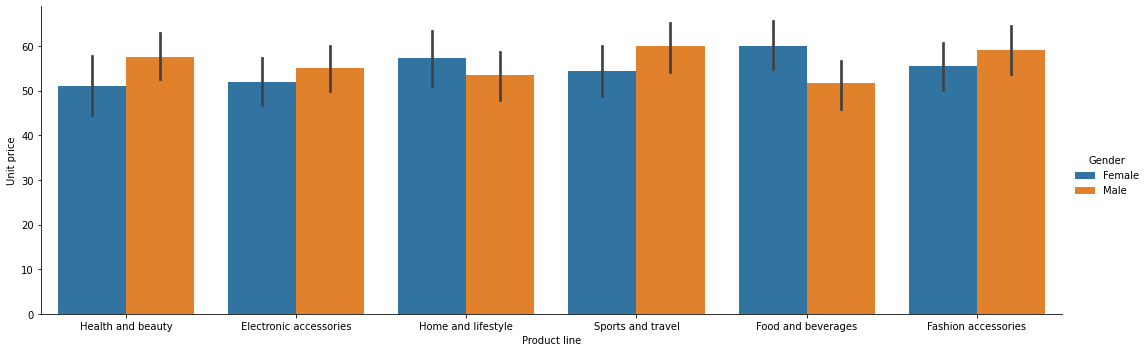

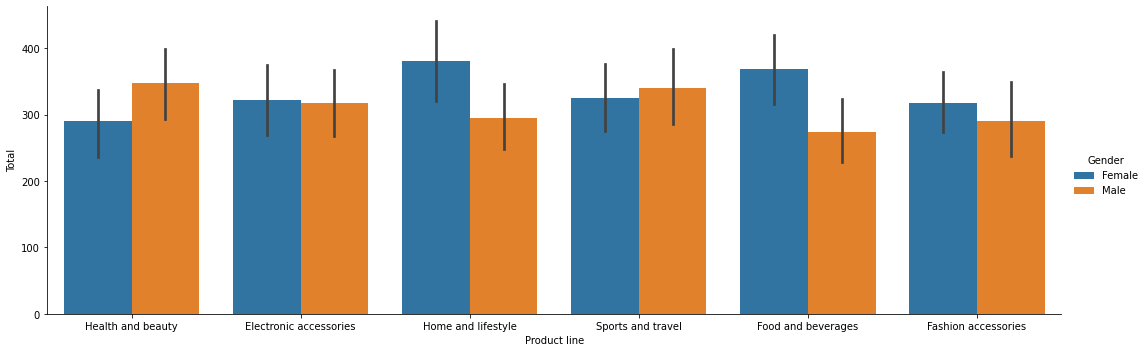

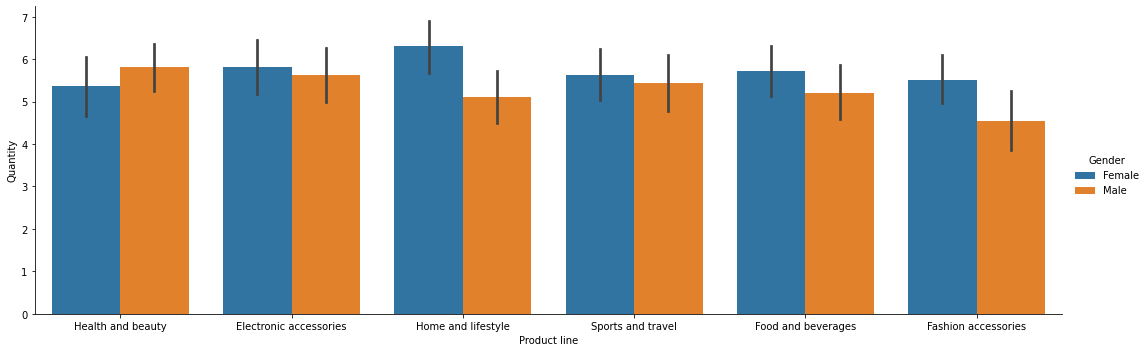

In [134]:
sns.catplot(x='Product line',y='Unit price',hue='Gender',data=df, kind = 'bar', aspect = 3 )
sns.catplot(x='Product line',y='Total',hue='Gender',data=df, kind = 'bar', aspect = 3 )
sns.catplot(x='Product line',y='Quantity',hue='Gender',data=df, kind = 'bar', aspect = 3 )

Females custommers are most frequent on Fashion accesoires and Sports & travel.
Males customers are most frequent on Health and beauty.

Text(0, 0.5, 'Average Gross Income')

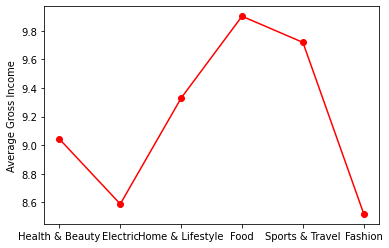

In [122]:
li = [[0, 0] for i in range(6)]
a = {
    'Health and beauty' : 0,
    'Electronic accessories' : 1,
    'Home and lifestyle' : 2,
    'Sports and travel' : 4,
    'Food and beverages' : 3,
    'Fashion accessories' : 5
}
dummy = [0 for i in range(6)]
for i in range(1000):
    li[a[df.at[i, 'Product line']]][0] += df.at[i, 'gross income']
    li[a[df.at[i, 'Product line']]][1] += 1
for i in range(6):
    dummy[i] = li[i][0]
    li[i] = li[i][0]/li[i][1]
    
plt.plot(['Health & Beauty', 'Electric', 'Home & Lifestyle', 'Food', 'Sports & Travel', 'Fashion'], li, color = 'red', marker = 'o')
plt.ylabel('Average Gross Income')

Text(0, 0.5, 'Net Income')

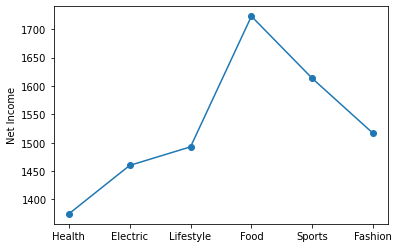

In [133]:
plt.plot(['Health', 'Electric', 'Lifestyle', 'Food', 'Sports', 'Fashion'], dummy, marker = 'o')
plt.ylabel('Net Income')

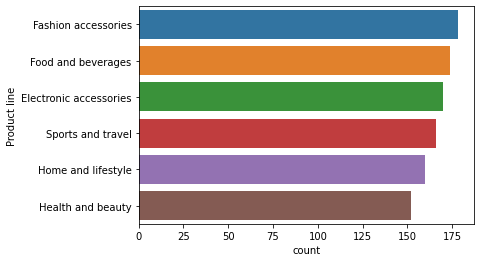

In [120]:
sns.countplot(y = 'Product line', data=df, order = df['Product line'].value_counts().index)

Although, the sales of fashion accessories is the maximum of all other product segments, it yields least gross income. So, gross margin percentage could be increased in this sector

The net gross income from the Health and Beauty Sector is least, though its average gross income is high....So, the supermarket should focus on better advertisement and should try to improve the sales of this sector as it could yield good profit.

Electronic and Fashion sectors are yielding minimum gross income whereas Food and Sports and Travel Sector are showing marvelous gross incomes

In [51]:
for i in range(1000):
    df.at[i, 'discount'] = random.randrange(0, 5)
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,discount
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Jan,4
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,Mar,4
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,Mar,0
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Jan,2
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Feb,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,Jan,0
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,Mar,3
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,Feb,4
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,Feb,0


In [54]:
columns = [5, 12, 17]
for i in columns:
    onehot_encoder = preprocessing.OneHotEncoder(sparse = False)
    li = onehot_encoder.fit_transform(df.iloc[:, i].values.reshape(1000, 1))
    # print(li, len(li))
    for j in range(len(li[0])):
        df.at[:, df.columns[i] + str(j)] = li[:, j]
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Product line2,Product line3,Product line4,Product line5,Payment0,Payment1,Payment2,Month0,Month1,Month2
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [57]:
for i in range(1000):
    df.at[i, 'gross income'] = df.at[i, 'gross income'] * (5 - df.at[i, 'discount']) / 5
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Product line2,Product line3,Product line4,Product line5,Payment0,Payment1,Payment2,Month0,Month1,Month2
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [56]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Month', 'discount', 'Product line0', 'Product line1',
       'Product line2', 'Product line3', 'Product line4', 'Product line5',
       'Payment0', 'Payment1', 'Payment2', 'Month0', 'Month1', 'Month2'],
      dtype='object')

In [62]:
regr = LinearRegression()

This model will tell us the gross income that can be earned from a product in a day given its product line, rating, payment gateway and discount

In [63]:
regr.fit(df[['Rating', 'discount', 'Product line0', 'Product line1', 'Product line2', 'Product line3', 'Product line4', 'Product line5', 'Payment0', 'Payment1', 'Payment2', 'Month0', 'Month1', 'Month2']], df['gross income'])

LinearRegression()

In [64]:
regr.coef_

array([-0.04671671, -2.7900166 , -0.31414619, -1.01095658,  0.46814986,
        0.10144051,  0.3503031 ,  0.4052093 ,  0.15445061, -0.19432218,
        0.03987157,  0.04890028, -0.01440356, -0.03449672])

In [66]:
regr.intercept_

14.979758933053303

In [68]:
regr.predict(df[['Rating', 'discount', 'Product line0', 'Product line1', 'Product line2', 'Product line3', 'Product line4', 'Product line5', 'Payment0', 'Payment1', 'Payment2', 'Month0', 'Month1', 'Month2']])

array([ 3.52147895,  3.17701977, 14.75553947,  9.13421386, 12.4361249 ,
        3.31938266,  8.90339445, 12.25508358, 14.53611337, 12.23684169,
        8.26731579, 11.67787638,  3.26262952,  9.57357039, 12.14485146,
        6.94474026,  6.26743385, 12.06388057,  6.46736951, 12.33986675,
       11.74012777,  9.26828585,  3.73562319, 14.29188914,  3.94997639,
       11.91413448, 13.85915127, 13.38026477, 15.1394754 ,  3.69538324,
        5.22909043,  9.73475686,  4.12669362, 11.8241087 , 15.1863053 ,
       12.30274599,  6.69327628,  8.891479  ,  6.36147746,  3.93023082,
        6.6164182 ,  4.07903122,  4.16663911, 15.21281567, 14.864793  ,
       14.34175786,  3.38329074, 15.34514212, 11.35176887,  8.02508197,
       15.20745091,  9.67413442,  2.51045216, 13.47510467,  9.45174505,
        8.90585338,  4.01899257, 12.07162438, 12.42782223, 14.3511012 ,
       14.7723792 ,  9.51178369, 15.00657295, 14.7543856 ,  3.76943689,
        6.56014658,  9.27693611, 13.53177491, 15.22602831,  3.92

In [74]:
df.iloc[:, [17, 28, 29, 30]]

,Month,Month0,Month1,Month2
0,Jan,0.0,1.0,0.0
1,Mar,0.0,0.0,1.0
2,Mar,0.0,0.0,1.0
3,Jan,0.0,1.0,0.0
4,Feb,1.0,0.0,0.0
...,...,...,...,...
995,Jan,0.0,1.0,0.0
996,Mar,0.0,0.0,1.0
997,Feb,1.0,0.0,0.0
998,Feb,1.0,0.0,0.0


In [75]:
a = ['Rating', 'discount', 'Electronic accessories', 'Fashion accessories', 'Food and beverages', 'Health and beauty', 'Home and lifestyle', 'Sports and travel', 'Cash', 'Credit Card', 'Ewallet', 'Feb', 'Jan', 'Mar']
b = [-0.04671671, -2.7900166 , -0.31414619, -1.01095658,  0.46814986,
0.10144051,  0.3503031 ,  0.4052093 ,  0.15445061, -0.19432218, 0.03987157,  0.04890028, -0.01440356, -0.03449672]
dict1 = dict(zip(a, b))
dict1

{'Rating': -0.04671671,
 'discount': -2.7900166,
 'Electronic accessories': -0.31414619,
 'Fashion accessories': -1.01095658,
 'Food and beverages': 0.46814986,
 'Health and beauty': 0.10144051,
 'Home and lifestyle': 0.3503031,
 'Sports and travel': 0.4052093,
 'Cash': 0.15445061,
 'Credit Card': -0.19432218,
 'Ewallet': 0.03987157,
 'Feb': 0.04890028,
 'Jan': -0.01440356,
 'Mar': -0.03449672}